# CISC/CMPE 452/COGS 400 Assignment 3 - Unsupervised Learning (10 points)  

Please put your name and student id

    Devynn Garrow, #20148909

- Make sure to run all the cells from the beginning before submission. Do not clear out the outputs. You will only get credit for code that has been run.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted).
- You can only use Numpy to build the models. Other packages such as Pandas, Sklearn and Scipy can be used for evaluation metrics calculating, data processing, and file reading and writing.

### Files need to be uploaded for this assignment: A3.ipynb, output.wav, and output.csv

## Part 1 Principle Component Analysis Network (5 points)
The dataset "data/sound.csv" contains two sounds recorded by the two microphones. The goal of this assignment is using PCA network to find the approximation of the first principal component.
- Build a PCA network (refer to Principal Component Analysis slide #22 and #23) to reduce the number of features from 2 to 1 (3 points)  
- Train the model and generate the processed data (1 point)  
- Save the data into output.wav and output.csv files (1 point)  
- Compare the sound_o.wav (audio with noise) and output.wav (audio is denoised)  

In [212]:
import numpy as np
import pandas as pd
from scipy.io import wavfile

In [213]:
samrate = 8000

In [214]:
# read csv into array
txtData = np.genfromtxt('data/sound.csv', delimiter=',')
txtData.shape

(50000, 2)

In [215]:
# save array to WAV file
scaledData = np.int16(txtData * samrate)
wavfile.write('data/sound_o.wav', samrate, scaledData)

In [216]:
# read WAV file into array
# The data in sound.csv is processed
# If you use the data generated here, you need to process the data by adding wavData = wavData / samrate
samrate, wavData = wavfile.read('data/sound_o.wav')
samrate, wavData.shape

(8000, (50000, 2))

In [217]:
# save array to csv file
np.savetxt('data/sound_o.csv', txtData, delimiter=',')

In [218]:
# build PCA model and only Numpy can be used
class PCA(object):
    def __init__(self, lr, epoch):
        self.lr = lr
        self.epoch = epoch

    def train(self, x, n_components):
        self.W = np.random.normal(0, 0.1, n_components)
        for j in range(0, self.epoch):
            for xi in x:
                yi = np.sum(np.multiply(self.W, xi))
                ki = np.square(yi)
                deltaWi = np.subtract(self.lr*np.multiply(yi, xi),np.multiply(ki, self.W))
                self.W = self.W + deltaWi        



In [219]:
# initialize and train the model
learning_rate = 0.5
num_epochs = 100

processedWavData = np.divide(wavData, samrate)
model = PCA(learning_rate, num_epochs)
model.train(processedWavData, processedWavData[0].size)


In [220]:
# save the data
outputData = []
for xi in processedWavData:
    yi = np.sum(np.multiply(model.W, xi))
    outputData.append(yi)

# save output to csv file
output = np.asarray(outputData)
np.savetxt("output.csv", output, delimiter=",")

# save output to WAV file
scaledOutputData = np.int16(output * samrate)
wavfile.write('output.wav', samrate, scaledOutputData)

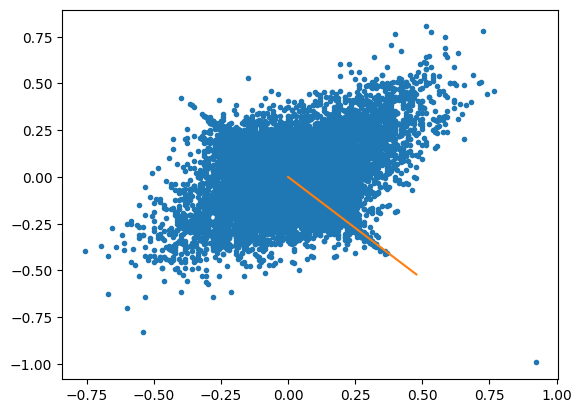

In [221]:
#Visualize Results
import matplotlib.pyplot as plt

x = []
y = []
for xi in processedWavData:
    x.append(xi[0])
    y.append(xi[1])

plt.plot(x,y, '.')
weightsX = [0, model.W[0]]
weightsY = [0, model.W[1]]
plt.plot(weightsX, weightsY)
plt.show()

Upon listening to both the sound_o.wav and output.wav files, the noise is essentially completely gone in the output.wav files.  In the sound_o.wav file, there is a man speaking on top of the music, but in the output.wav file, there is only the music, the integrity of which seems to have been preserved, as it sounds similar to sound_o.wav, but without the "noise" of the man speaking over top.

## Part 2 K-Means Clustering Algorithm (5 points)
The dataset is [Palmer Archipelago (Antarctica) penguin data](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) which has 6 features and 1 label called species (Chinstrap, Adélie, or Gentoo)  
The dataset is saved in the "data/penguins_size.csv" file and preprocessed into x_train, x_test, y_train, y_test  
- Build a K-Means clustering algorithm (refer to Unsupervised Learning slide #29) to cluster the preprocessed data (2 points)  
- Standardize the data and train the model with the training set (1 point)  
- Evaluate the model and print the confusion matrixes with both training and test sets (2 points)  


In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [235]:
# load the dataset
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [236]:
# data preprocessing
data = data.dropna()
data = data[data['sex'] != '.']

cleanup_nums = {"species": {"Adelie": 0, "Chinstrap": 1, "Gentoo": 2},
                "island": {"Biscoe": 0, "Dream": 1, "Torgersen": 2},
                "sex": {"MALE": 0.0, "FEMALE": 1.0}}
data = data.replace(cleanup_nums)

data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0.0
1,0,2,39.5,17.4,186.0,3800.0,1.0
2,0,2,40.3,18.0,195.0,3250.0,1.0
4,0,2,36.7,19.3,193.0,3450.0,1.0
5,0,2,39.3,20.6,190.0,3650.0,0.0


In [237]:
x = np.array(data.drop(['species'], axis=1).copy())
y = np.array(data['species'].copy()).astype(int)

In [238]:
# data standardization
x = StandardScaler().fit_transform(x,y)

In [239]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((266, 6), (67, 6), (266,), (67,))

In [240]:
# calculate the confusion matrix
def evaluator(y, y_pred):    
    confusionMatrix = confusion_matrix(y, y_pred)
    print('Confusion matrix:\n', confusionMatrix)

In [261]:
# setup a baseline model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) # n_clusters - the number of clusters
km.fit(x_train)
y_pred = km.predict(x_train)
evaluator(y_train, y_pred)
y_pred = km.predict(x_test)
evaluator(y_test, y_pred)

Confusion matrix:
 [[  0  60  47]
 [  0  32  26]
 [101   0   0]]
Confusion matrix:
 [[ 0 13 26]
 [ 0  2  8]
 [18  0  0]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [242]:
# build K-means model and only Numpy can be used
class KMeans(object):
    def __init__(self, n_clusters):
        self.k = n_clusters
        self.w = []

    def euclidianDistanceSquared(self, x, w):
        d = 0
        for i in range(0, len(x)):
            d = d + np.square((x[i]-w[i]))
        return d
        
    def train(self, x, y, x_test, y_test, learning_rate, n_iters):
        winningNodeInputs = []
        for j in range(0, self.k):
            self.w.append(x[np.random.randint(0, len(x))])
            winningNodeInputs.append([])
        
        for n in range(0, n_iters):
            winningNodeInputs = []
            for j in range(0, self.k):
                winningNodeInputs.append([])
            # Run through each pattern -- 1 epoch
            for ip in x:
                eucDist = np.zeros(self.k)
                for j in range(0, self.k):
                    eucDist[j] = self.euclidianDistanceSquared(ip, self.w[j])
                    if(j == 0):
                        minEucDist = eucDist[j]
                        cluster = j
                    elif(eucDist[j] < minEucDist):
                        minEucDist = eucDist[j]
                        cluster = j
                winningNodeInputs[cluster].append(ip)

            # After all patterns have been evaluated, batch update weights
            for j in range(0, self.k):
                self.w[j] = np.average(winningNodeInputs[j], axis = 0)            

    def predict(self, x):
        y = []
        for ip in x:                
            eucDist = np.zeros(self.k)
            for j in range(0, self.k):
                eucDist[j] = self.euclidianDistanceSquared(ip, self.w[j])
                if(j == 0):
                    minEucDist = eucDist[j]
                    cluster = j
                elif(eucDist[j] < minEucDist):
                    minEucDist = eucDist[j]
                    cluster = j
            y.append(cluster)
        return np.asarray(y)


In [255]:
# initialize and train the model
k = 3 #chose to use 3 clusters as there are 3 species
learning_rate = 0.5
n_iters = 100

model = KMeans(n_clusters=3) # n_clusters - the number of clusters
model.train(x_train, y_train, x_test, y_test, learning_rate, n_iters)


In [256]:
# evaluate the model and print the confusion matrixes for both training and test sets
y_pred = model.predict(x_train)
evaluator(y_train, y_pred)

y_pred = model.predict(x_test)
evaluator(y_test, y_pred)

Confusion matrix:
 [[  0  60  47]
 [  0  32  26]
 [101   0   0]]
Confusion matrix:
 [[ 0 13 26]
 [ 0  2  8]
 [18  0  0]]


Cluster 1 in expected data isn't necessarily cluster 1 for model, depending on how cluster weights are initialized, so therefore only relative numbers of confusion matrix should be compared, not specific location (i.e. the position of the 60 value in the first show should be the same as the position of the 32 in the second row and a 0 in the 3rd row).  The confusion matrix of the model I implemented is the same as the one for the implementation using the baseline sklearn.cluster.KMeans model, meaning this model is quite accurate